In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from os.path import join
import re

# read files

In [2]:
results_dir = '../data/results/'

diversity_path = join(results_dir, 'diversity_results.csv')
quality_path = join(results_dir, 'quality_results.csv')
discriminativeness_path = join(results_dir, 'discriminativeness_results.csv')

oov_gained_path = join(results_dir, 'oov_gained_rank.csv')
gained_caps_path = join(results_dir, 'gained_caps.csv')

gained_tokens_pos_wn_path = join(results_dir, 'gained_tokens_pos_distribution_wn_distance.csv')
gained_types_pos_wn_path = join(results_dir, 'gained_types_pos_distribution_wn_distance.csv')
all_tokens_pos_wn_path = join(results_dir, 'tokens_pos_distribution_wn_distance.csv')

In [3]:
diversity_df = pd.read_csv(diversity_path, index_col=0)
quality_df = pd.read_csv(quality_path, index_col=0)
discriminativeness_df = pd.read_csv(discriminativeness_path)
discriminativeness_df = discriminativeness_df.rename(columns={'Unnamed: 0': 'file'})

oov_gained_rank_df = pd.read_csv(oov_gained_path, index_col=0)
gained_caps_df = pd.read_csv(gained_caps_path, index_col=0)

gained_tokens_pos_wn_df = pd.read_csv(gained_tokens_pos_wn_path, index_col=0)
gained_types_pos_wn_df = pd.read_csv(gained_types_pos_wn_path, index_col=0)
all_tokens_pos_wn_df = pd.read_csv(all_tokens_pos_wn_path, index_col=0)

# extract parameter settings encoded in name; prepare sorting

In [4]:
def get_lambda(s):
    match = re.search(r'_l-(\d-\d)',s)
    if match:
        d = match.group(1).replace('-', '.')
        return float(d)
    else:
        return None
    
def get_rationality(s):
    match = re.search(r'_r-(\d-\d)',s)
    if match:
        d = match.group(1).replace('-', '.')
        return float(d)
    else:
        return None
    
def get_n_distractors(s):
    match = re.search(r'_d-(\d)',s)
    if match:
        d = match.group(1)
        return int(d)
    else:
        return None
    
def get_topk(s):
    match = re.search(r'_k-(\d+)',s)
    if match:
        d = match.group(1)
        return int(d)
    else:
        return None

def get_topp(s):
    match = re.search(r'_p-(\d-\d)',s)
    if match:
        d = match.group(1).replace('-', '.')
        return float(d)
    else:
        return None

def get_temperature(s):
    match = re.search(r'_t-(\d-\d)',s)
    if match:
        d = match.group(1).replace('-', '.')
        return float(d)
    else:
        return None    
def get_segmentation(s):
    if s.endswith('char'):
        return 'char'
    else:
        return 'word'
    
def get_method(s):
    match = re.search(r'((val)|(test))_([a-z\_]+)_d\-', s)
    if match:
        return (match.group(4))
    else:
        return None
    

diversity_df['_lambda'] = diversity_df.index.map(get_lambda)
diversity_df['rationality'] = diversity_df.index.map(get_rationality)
diversity_df['n_distractors'] = diversity_df.index.map(get_n_distractors)
diversity_df['topk'] = diversity_df.index.map(get_topk)
diversity_df['topp'] = diversity_df.index.map(get_topp)
diversity_df['temperature'] = diversity_df.index.map(get_temperature)
diversity_df['segmentation'] = diversity_df.index.map(get_segmentation)
diversity_df['method'] = diversity_df.index.map(get_method)

quality_df['_lambda'] = quality_df.index.map(get_lambda)
quality_df['rationality'] = quality_df.index.map(get_rationality)
quality_df['n_distractors'] = quality_df.index.map(get_n_distractors)
quality_df['topk'] = quality_df.index.map(get_topk)
quality_df['topp'] = quality_df.index.map(get_topp)
quality_df['temperature'] = quality_df.index.map(get_temperature)
quality_df['segmentation'] = quality_df.index.map(get_segmentation)
quality_df['method'] = quality_df.index.map(get_method)

discriminativeness_df['_lambda'] = discriminativeness_df.file.map(get_lambda)
discriminativeness_df['rationality'] = discriminativeness_df.file.map(get_rationality)
discriminativeness_df['n_distractors'] = discriminativeness_df.file.map(get_n_distractors)
discriminativeness_df['topk'] = discriminativeness_df.file.map(get_topk)
discriminativeness_df['topp'] = discriminativeness_df.file.map(get_topp)
discriminativeness_df['temperature'] = discriminativeness_df.file.map(get_temperature)
discriminativeness_df['segmentation'] = discriminativeness_df.file.map(get_segmentation)
discriminativeness_df['method'] = discriminativeness_df.file.map(get_method)

oov_gained_rank_df['_lambda'] = oov_gained_rank_df.index.map(get_lambda)
oov_gained_rank_df['rationality'] = oov_gained_rank_df.index.map(get_rationality)
oov_gained_rank_df['n_distractors'] = oov_gained_rank_df.index.map(get_n_distractors)
oov_gained_rank_df['topk'] = oov_gained_rank_df.index.map(get_topk)
oov_gained_rank_df['topp'] = oov_gained_rank_df.index.map(get_topp)
oov_gained_rank_df['temperature'] = oov_gained_rank_df.index.map(get_temperature)
oov_gained_rank_df['segmentation'] = oov_gained_rank_df.index.map(get_segmentation)
oov_gained_rank_df['method'] = oov_gained_rank_df.index.map(get_method)

gained_caps_df['_lambda'] = gained_caps_df.index.map(get_lambda)
gained_caps_df['rationality'] = gained_caps_df.index.map(get_rationality)
gained_caps_df['n_distractors'] = gained_caps_df.index.map(get_n_distractors)
gained_caps_df['topk'] = gained_caps_df.index.map(get_topk)
gained_caps_df['topp'] = gained_caps_df.index.map(get_topp)
gained_caps_df['temperature'] = gained_caps_df.index.map(get_temperature)
gained_caps_df['segmentation'] = gained_caps_df.index.map(get_segmentation)
gained_caps_df['method'] = gained_caps_df.index.map(get_method)

gained_tokens_pos_wn_df['_lambda'] = gained_tokens_pos_wn_df.index.map(get_lambda)
gained_tokens_pos_wn_df['rationality'] = gained_tokens_pos_wn_df.index.map(get_rationality)
gained_tokens_pos_wn_df['n_distractors'] = gained_tokens_pos_wn_df.index.map(get_n_distractors)
gained_tokens_pos_wn_df['topk'] = gained_tokens_pos_wn_df.index.map(get_topk)
gained_tokens_pos_wn_df['topp'] = gained_tokens_pos_wn_df.index.map(get_topp)
gained_tokens_pos_wn_df['temperature'] = gained_tokens_pos_wn_df.index.map(get_temperature)
gained_tokens_pos_wn_df['segmentation'] = gained_tokens_pos_wn_df.index.map(get_segmentation)
gained_tokens_pos_wn_df['method'] = gained_tokens_pos_wn_df.index.map(get_method)

gained_types_pos_wn_df['_lambda'] = gained_types_pos_wn_df.index.map(get_lambda)
gained_types_pos_wn_df['rationality'] = gained_types_pos_wn_df.index.map(get_rationality)
gained_types_pos_wn_df['n_distractors'] = gained_types_pos_wn_df.index.map(get_n_distractors)
gained_types_pos_wn_df['topk'] = gained_types_pos_wn_df.index.map(get_topk)
gained_types_pos_wn_df['topp'] = gained_types_pos_wn_df.index.map(get_topp)
gained_types_pos_wn_df['temperature'] = gained_types_pos_wn_df.index.map(get_temperature)
gained_types_pos_wn_df['segmentation'] = gained_types_pos_wn_df.index.map(get_segmentation)
gained_types_pos_wn_df['method'] = gained_types_pos_wn_df.index.map(get_method)

all_tokens_pos_wn_df['_lambda'] = all_tokens_pos_wn_df.index.map(get_lambda)
all_tokens_pos_wn_df['rationality'] = all_tokens_pos_wn_df.index.map(get_rationality)
all_tokens_pos_wn_df['n_distractors'] = all_tokens_pos_wn_df.index.map(get_n_distractors)
all_tokens_pos_wn_df['topk'] = all_tokens_pos_wn_df.index.map(get_topk)
all_tokens_pos_wn_df['topp'] = all_tokens_pos_wn_df.index.map(get_topp)
all_tokens_pos_wn_df['temperature'] = all_tokens_pos_wn_df.index.map(get_temperature)
all_tokens_pos_wn_df['segmentation'] = all_tokens_pos_wn_df.index.map(get_segmentation)
all_tokens_pos_wn_df['method'] = all_tokens_pos_wn_df.index.map(get_method)

In [5]:
methods = ['greedy', 'beam', 'topk', 'nucleus', 'distfuse_es', 'predfuse_es', 'rsa', 'annotations']

diversity_df.method = pd.Categorical(diversity_df.method, categories=methods, ordered=True)
quality_df.method = pd.Categorical(quality_df.method, categories=methods, ordered=True)
discriminativeness_df.method = pd.Categorical(discriminativeness_df.method, categories=methods, ordered=True)
oov_gained_rank_df.method = pd.Categorical(oov_gained_rank_df.method, categories=methods, ordered=True)
gained_caps_df.method = pd.Categorical(gained_caps_df.method, categories=methods, ordered=True)
gained_tokens_pos_wn_df.method = pd.Categorical(gained_tokens_pos_wn_df.method, categories=methods, ordered=True)
gained_types_pos_wn_df.method = pd.Categorical(gained_types_pos_wn_df.method, categories=methods, ordered=True)
all_tokens_pos_wn_df.method = pd.Categorical(all_tokens_pos_wn_df.method, categories=methods, ordered=True)

sortings = [
    ('method', True),
    ('n_distractors', True),
    ('_lambda', False),
    ('rationality', True),
    ('topp', True),
    ('topk', True),
    ('temperature', True)
]

sort_order = [s[0] for s in sortings]
ascending =  [s[1] for s in sortings]

In [6]:
# files to include

include = {
    'topk': [10,25],
    'topp': [0.9, 0.7],
    'temperature': [0.7, 1.0]
}

topk_files = diversity_df.loc[diversity_df.method == 'topk']\
    .loc[diversity_df.topk.isin(include['topk'])]\
    .loc[diversity_df.temperature.isin(include['temperature'])]\
    .index.to_list()

nucleus_files = diversity_df.loc[diversity_df.method == 'nucleus']\
    .loc[diversity_df.topp.isin(include['topp'])]\
    .loc[diversity_df.temperature.isin(include['temperature'])]\
    .index.to_list()

es_files = diversity_df.loc[diversity_df.method == 'predfuse_es']\
    .index.to_list()

rsa_files = diversity_df.loc[diversity_df.method == 'rsa']\
    .index.to_list()

baseline_files = diversity_df.loc[diversity_df.method.isin(['greedy', 'beam'])]\
    .index.to_list()

human_file = ['coco_test_annotations_d-na_l-na_r-na_t-na_p-na_k-na']

# quality

In [7]:
metrics = ['Bleu_4', 'CIDEr', 'SPICE']
# 'Bleu_1', 'Bleu_2', 'Bleu_3', 'ROUGE_L',

In [8]:
print_selection = quality_df\
    .loc[baseline_files + topk_files + nucleus_files + es_files + rsa_files + human_file]\
    .loc[np.logical_not(quality_df.n_distractors.isin([4.0, 9.0]))]\
    .sort_values(sort_order, ascending=ascending)\
    [['n_distractors'] + metrics]

print_selection = print_selection.round(3)
print_selection = print_selection.fillna('-')

display(print_selection)
print(print_selection.to_latex())

,n_distractors,Bleu_4,CIDEr,SPICE
file,,,,
coco_test_greedy_d-na_l-na_r-na,-,0.303,0.988,0.188
coco_test_beam_d-na_l-na_r-na,-,0.321,1.020,0.192
coco_test_topk_d-na_l-na_r-na_t-0-7_p-na_k-10,-,0.231,0.813,0.168
coco_test_topk_d-na_l-na_r-na_t-1-0_p-na_k-10,-,0.173,0.673,0.153
coco_test_topk_d-na_l-na_r-na_t-0-7_p-na_k-25,-,0.222,0.785,0.164
coco_test_topk_d-na_l-na_r-na_t-1-0_p-na_k-25,-,0.154,0.612,0.144
coco_test_nucleus_d-na_l-na_r-na_t-0-7_p-0-7_k-na,-,0.276,0.923,0.180
coco_test_nucleus_d-na_l-na_r-na_t-1-0_p-0-7_k-na,-,0.223,0.779,0.164
coco_test_nucleus_d-na_l-na_r-na_t-0-7_p-0-9_k-na,-,0.250,0.855,0.174


\begin{tabular}{llrrr}
\toprule
{} & n\_distractors &  Bleu\_4 &  CIDEr &  SPICE \\
file                                               &               &         &        &        \\
\midrule
coco\_test\_greedy\_d-na\_l-na\_r-na                    &             - &   0.303 &  0.988 &  0.188 \\
coco\_test\_beam\_d-na\_l-na\_r-na                      &             - &   0.321 &  1.020 &  0.192 \\
coco\_test\_topk\_d-na\_l-na\_r-na\_t-0-7\_p-na\_k-10      &             - &   0.231 &  0.813 &  0.168 \\
coco\_test\_topk\_d-na\_l-na\_r-na\_t-1-0\_p-na\_k-10      &             - &   0.173 &  0.673 &  0.153 \\
coco\_test\_topk\_d-na\_l-na\_r-na\_t-0-7\_p-na\_k-25      &             - &   0.222 &  0.785 &  0.164 \\
coco\_test\_topk\_d-na\_l-na\_r-na\_t-1-0\_p-na\_k-25      &             - &   0.154 &  0.612 &  0.144 \\
coco\_test\_nucleus\_d-na\_l-na\_r-na\_t-0-7\_p-0-7\_k-na  &             - &   0.276 &  0.923 &  0.180 \\
coco\_test\_nucleus\_d-na\_l-na\_r-na\_t-1-0\_p-0-7\_k-na  &             

<ipython-input-8-6dec38e49ecd>:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(print_selection.to_latex())


# diversity

In [9]:
sent_metrics = ['average_sentence_length', 'std_sentence_length']
ttr_metrics = ['type_token_ratio', 'bittr']#, 'trittr']
novel_metrics = ['percentage_novel']
vocab_metrics = ['num_types', 'coverage']#, 'loc5']

metrics = [ttr_metrics, novel_metrics, vocab_metrics, sent_metrics]

In [10]:
print_selection = diversity_df\
    .loc[baseline_files + topk_files + nucleus_files + es_files + rsa_files + human_file]\
    .loc[np.logical_not(diversity_df.n_distractors.isin([4.0, 9.0]))]\
    .sort_values(sort_order, ascending=ascending)\
    [['n_distractors'] + [m for sublist in metrics for m in sublist]]

print_selection['coverage'] = print_selection.coverage * 100
print_selection = print_selection.round(3)
print_selection = print_selection.rename(columns={
    'type_token_ratio': 'TTR1',
    'bittr': 'TTR2',
    'trittr': 'TTR3',
})
print_selection = print_selection.fillna('-')

display(print_selection)
print(print_selection.to_latex())

,n_distractors,TTR1,TTR2,percentage_novel,num_types,coverage,average_sentence_length,std_sentence_length
file,,,,,,,,
coco_test_greedy_d-na_l-na_r-na,-,0.232,0.532,72.36,929.0,11.050,9.643,1.410
coco_test_beam_d-na_l-na_r-na,-,0.219,0.482,51.52,829.0,9.861,9.621,1.227
coco_test_topk_d-na_l-na_r-na_t-0-7_p-na_k-10,-,0.268,0.627,87.18,1338.0,15.915,9.905,1.634
coco_test_topk_d-na_l-na_r-na_t-1-0_p-na_k-10,-,0.296,0.694,94.54,1586.0,18.865,10.158,1.967
coco_test_topk_d-na_l-na_r-na_t-0-7_p-na_k-25,-,0.278,0.641,89.02,1482.0,17.616,9.964,1.717
coco_test_topk_d-na_l-na_r-na_t-1-0_p-na_k-25,-,0.314,0.721,96.02,1857.0,22.077,10.234,2.032
coco_test_nucleus_d-na_l-na_r-na_t-0-7_p-0-7_k-na,-,0.244,0.566,77.92,1088.0,12.942,9.732,1.451
coco_test_nucleus_d-na_l-na_r-na_t-1-0_p-0-7_k-na,-,0.280,0.638,87.66,1546.0,18.389,9.949,1.620
coco_test_nucleus_d-na_l-na_r-na_t-0-7_p-0-9_k-na,-,0.261,0.601,84.24,1319.0,15.677,9.880,1.554


\begin{tabular}{llrrrrrrr}
\toprule
{} & n\_distractors &   TTR1 &   TTR2 &  percentage\_novel &  num\_types &  coverage &  average\_sentence\_length &  std\_sentence\_length \\
file                                               &               &        &        &                   &            &           &                          &                      \\
\midrule
coco\_test\_greedy\_d-na\_l-na\_r-na                    &             - &  0.232 &  0.532 &             72.36 &      929.0 &    11.050 &                    9.643 &                1.410 \\
coco\_test\_beam\_d-na\_l-na\_r-na                      &             - &  0.219 &  0.482 &             51.52 &      829.0 &     9.861 &                    9.621 &                1.227 \\
coco\_test\_topk\_d-na\_l-na\_r-na\_t-0-7\_p-na\_k-10      &             - &  0.268 &  0.627 &             87.18 &     1338.0 &    15.915 &                    9.905 &                1.634 \\
coco\_test\_topk\_d-na\_l-na\_r-na\_t-1-0\_p-na\_k-10      &   

<ipython-input-10-01f49e0770ed>:17: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(print_selection.to_latex())


# informativity

In [11]:
selection = discriminativeness_df\
    .loc[discriminativeness_df.file.isin(baseline_files + topk_files + nucleus_files + es_files + rsa_files + human_file)]

for n_d in pd.unique(discriminativeness_df.n_eval_dists):
    subselection = selection.loc[selection.n_eval_dists == n_d]
    subselection = subselection.sort_values(sort_order, ascending=ascending).set_index('file')[['n_eval_dists', 'acc']]
    subselection.acc = subselection.acc * 100
    display(subselection)
    #print(subselection.to_latex())

,n_eval_dists,acc
file,,
coco_test_greedy_d-na_l-na_r-na,2,68.42
coco_test_beam_d-na_l-na_r-na,2,66.98
coco_test_topk_d-na_l-na_r-na_t-0-7_p-na_k-10,2,67.92
coco_test_topk_d-na_l-na_r-na_t-1-0_p-na_k-10,2,66.66
coco_test_topk_d-na_l-na_r-na_t-0-7_p-na_k-25,2,66.14
coco_test_topk_d-na_l-na_r-na_t-1-0_p-na_k-25,2,67.00
coco_test_nucleus_d-na_l-na_r-na_t-0-7_p-0-7_k-na,2,67.38
coco_test_nucleus_d-na_l-na_r-na_t-1-0_p-0-7_k-na,2,66.58
coco_test_nucleus_d-na_l-na_r-na_t-0-7_p-0-9_k-na,2,67.32


,n_eval_dists,acc
file,,
coco_test_greedy_d-na_l-na_r-na,4,56.98
coco_test_beam_d-na_l-na_r-na,4,55.22
coco_test_topk_d-na_l-na_r-na_t-0-7_p-na_k-10,4,56.30
coco_test_topk_d-na_l-na_r-na_t-1-0_p-na_k-10,4,54.90
coco_test_topk_d-na_l-na_r-na_t-0-7_p-na_k-25,4,55.48
coco_test_topk_d-na_l-na_r-na_t-1-0_p-na_k-25,4,55.50
coco_test_nucleus_d-na_l-na_r-na_t-0-7_p-0-7_k-na,4,55.76
coco_test_nucleus_d-na_l-na_r-na_t-1-0_p-0-7_k-na,4,55.64
coco_test_nucleus_d-na_l-na_r-na_t-0-7_p-0-9_k-na,4,56.00


,n_eval_dists,acc
file,,
coco_test_greedy_d-na_l-na_r-na,9,44.34
coco_test_beam_d-na_l-na_r-na,9,42.56
coco_test_topk_d-na_l-na_r-na_t-0-7_p-na_k-10,9,44.00
coco_test_topk_d-na_l-na_r-na_t-1-0_p-na_k-10,9,42.78
coco_test_topk_d-na_l-na_r-na_t-0-7_p-na_k-25,9,43.50
coco_test_topk_d-na_l-na_r-na_t-1-0_p-na_k-25,9,42.62
coco_test_nucleus_d-na_l-na_r-na_t-0-7_p-0-7_k-na,9,43.88
coco_test_nucleus_d-na_l-na_r-na_t-1-0_p-0-7_k-na,9,43.14
coco_test_nucleus_d-na_l-na_r-na_t-0-7_p-0-9_k-na,9,43.62


# further lexical stats

In [12]:
print_selection = oov_gained_rank_df\
    .loc[baseline_files + topk_files + nucleus_files + es_files + rsa_files + human_file]\
    .sort_values(sort_order, ascending=ascending)

#print_selection = print_selection.fillna('-')
print_selection['gained_lost_ratio'] = print_selection.apply(lambda x: x.gained_types / x.lost_types if x.gained_types > 0 else 0, axis=1)
print_selection['gained_lost_diff'] = print_selection.gained_types - print_selection.lost_types
print_selection = print_selection[['gained_lost_ratio', 'rank_types', 'rank_tokens']]
print_selection = print_selection.round(2)#.astype({'gained_lost_diff': int})

display(print_selection)
#print(print_selection.to_latex())

,gained_lost_ratio,rank_types,rank_tokens
coco_test_greedy_d-na_l-na_r-na,0.00,737.93,86.36
coco_test_beam_d-na_l-na_r-na,0.52,652.25,79.35
coco_test_topk_d-na_l-na_r-na_t-0-7_p-na_k-10,5.54,886.29,106.02
coco_test_topk_d-na_l-na_r-na_t-1-0_p-na_k-10,8.92,1022.73,126.34
coco_test_topk_d-na_l-na_r-na_t-0-7_p-na_k-25,7.43,971.38,113.08
coco_test_topk_d-na_l-na_r-na_t-1-0_p-na_k-25,14.45,1153.18,145.17
coco_test_nucleus_d-na_l-na_r-na_t-0-7_p-0-7_k-na,2.48,792.13,92.71
coco_test_nucleus_d-na_l-na_r-na_t-1-0_p-0-7_k-na,8.35,1023.76,117.31
coco_test_nucleus_d-na_l-na_r-na_t-0-7_p-0-9_k-na,5.24,904.59,101.89
coco_test_nucleus_d-na_l-na_r-na_t-1-0_p-0-9_k-na,16.86,1362.44,168.11


In [13]:
print_selection = all_tokens_pos_wn_df.loc[np.logical_not(all_tokens_pos_wn_df.n_distractors.isin([4,9]))]\
    .sort_values(sort_order, ascending=ascending)

display((print_selection[['ADJ', 'NOUN', 'VERB']] * 100).round(2))
display(print_selection[['avg_wn_distance']].round(3))

,ADJ,NOUN,VERB
coco_test_greedy_d-na_l-na_r-na,3.90,35.65,8.09
coco_test_beam_d-na_l-na_r-na,4.75,36.40,9.19
coco_test_topk_d-na_l-na_r-na_t-1-0_p-na_k-5,5.45,34.54,7.66
coco_test_topk_d-na_l-na_r-na_t-0-7_p-na_k-10,5.18,35.19,7.89
coco_test_topk_d-na_l-na_r-na_t-1-0_p-na_k-10,6.30,34.28,7.93
coco_test_topk_d-na_l-na_r-na_t-0-7_p-na_k-25,5.43,34.83,8.02
coco_test_topk_d-na_l-na_r-na_t-1-0_p-na_k-25,6.57,34.16,8.30
coco_test_topk_d-na_l-na_r-na_t-1-0_p-na_k-50,7.00,34.25,8.54
coco_test_nucleus_d-na_l-na_r-na_t-1-0_p-0-1_k-na,3.91,35.70,8.06
coco_test_nucleus_d-na_l-na_r-na_t-1-0_p-0-2_k-na,4.06,35.66,8.13


,avg_wn_distance
coco_test_greedy_d-na_l-na_r-na,8.096
coco_test_beam_d-na_l-na_r-na,7.886
coco_test_topk_d-na_l-na_r-na_t-1-0_p-na_k-5,8.149
coco_test_topk_d-na_l-na_r-na_t-0-7_p-na_k-10,8.159
coco_test_topk_d-na_l-na_r-na_t-1-0_p-na_k-10,8.147
coco_test_topk_d-na_l-na_r-na_t-0-7_p-na_k-25,8.165
coco_test_topk_d-na_l-na_r-na_t-1-0_p-na_k-25,8.177
coco_test_topk_d-na_l-na_r-na_t-1-0_p-na_k-50,8.159
coco_test_nucleus_d-na_l-na_r-na_t-1-0_p-0-1_k-na,8.100
coco_test_nucleus_d-na_l-na_r-na_t-1-0_p-0-2_k-na,8.102


# r@1 / ttr curves

In [14]:
merged = pd.merge(
    discriminativeness_df, 
    diversity_df,
    left_on='file',
    right_index=True
)

merged['_lambda'] = merged.file.map(get_lambda)
merged['rationality'] = merged.file.map(get_rationality)
merged['n_distractors'] = merged.file.map(get_n_distractors)
merged['topk'] = merged.file.map(get_topk)
merged['topp'] = merged.file.map(get_topp)
merged['temperature'] = merged.file.map(get_temperature)
merged['segmentation'] = merged.file.map(get_segmentation)
merged['method'] = merged.file.map(get_method)
merged['n_eval_dists'] = merged.n_eval_dists.astype(int)

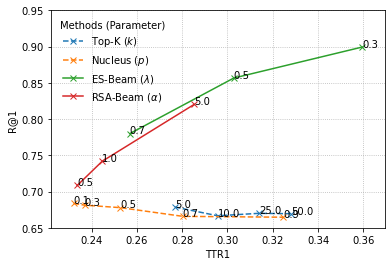

In [15]:
for n_dist in [2]:

    selection = merged.loc[merged.n_eval_dists == n_dist].loc[merged.method.isin(['predfuse_es', 'rsa', 'nucleus', 'topk'])]
    selection['temperature'] = selection.temperature.fillna(1.0)
    selection = selection.loc[selection.temperature == 1.0]
    selection = selection.loc[np.logical_or(selection.topp.isin([0.1,0.3,0.5,0.7,0.9]), selection.topp.isna())]
    
    methods = sorted(set(selection.method.to_list()))

    r = {}

    for m in methods:
        m_selection = selection.loc[selection.method == m]
        #m_selection = l_selection[['CIDEr', 'type_token_ratio', 'acc']]
        r[m] = m_selection.to_dict(orient='records')

    plt.figure(figsize=(6,4)) # 15,5

    for key in ['topk', 'nucleus', 'predfuse_es', 'rsa']:

        data = r[key]

        if not pd.isnull(data[0]['topk']):
            crit = 'topk'
            print_name = 'Top-K'
            print_crit = r'$k$'
            linestyle = '--'
            data = sorted(data, key=lambda x: x[crit])
        elif not pd.isnull(data[0]['topp']):
            crit = 'topp'
            print_name = 'Nucleus'
            print_crit = r'$p$'
            linestyle = '--'
            data = sorted(data, key=lambda x: x[crit])
        elif not pd.isnull(data[0]['_lambda']):
            crit = '_lambda'
            print_name = 'ES-Beam'
            print_crit = r'$\lambda$'
            linestyle = '-'
            data = sorted(data, key=lambda x: x[crit])
        elif not pd.isnull(data[0]['rationality']):
            crit = 'rationality'
            print_name = 'RSA-Beam'
            print_crit = r'$\alpha$'
            linestyle = '-'
            data = sorted(data, key=lambda x: x[crit])
        else:
            raise Exception()

        x = [d['type_token_ratio'] for d in data]
        y = [d['acc'] for d in data]
        crits = [d[crit] for d in data]

        plt.plot(x, y, label='{} ({})'.format(print_name, print_crit), marker='x', linestyle=linestyle)
        plt.ylim(0.65, 0.95)
        plt.xlabel('TTR1')
        plt.ylabel('R@1')
        plt.margins(x=0.08)

        plt.legend(title='Methods (Parameter)', loc='upper left', frameon=False, framealpha=0.5)
        plt.grid(True, which='major', linestyle='dotted')

        for i, txt in enumerate(crits):
            plt.annotate(txt, (x[i], y[i]))

    fname = 'acc_ttr_plot_{}dists.png'.format(n_dist)
    plt.savefig(fname, bbox_inches='tight')        
    plt.show()